# 1. 회귀 소개

목적 함수의 선을 예측하여 최대한 동일한 선을 긋는 과정

# 2. 단순 선형 화귀를 통한 회귀 이해

독립변수, 종속변수도 하나

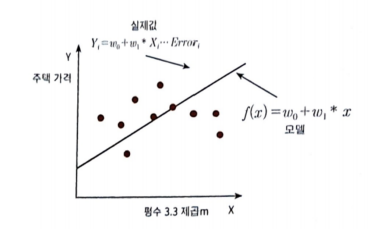

# 3. 비용 최소화 하기 - 경사 하강법(Gradient Descent) 소개

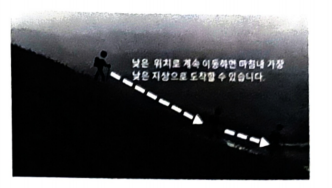

오류도를 줄이는데, 랜덤하게 줄이는 방법

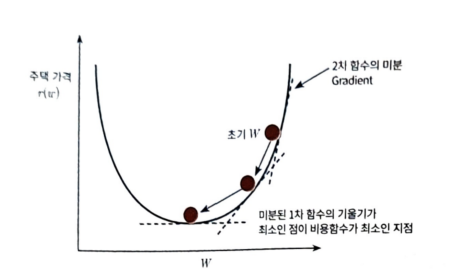

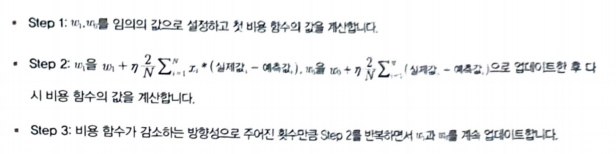

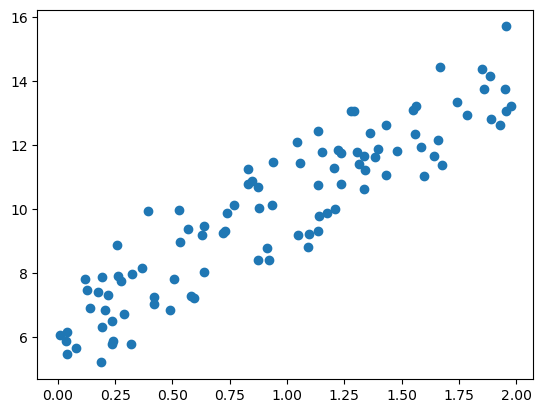

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 을 근사( w1 = 4, w0 = 6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)


In [2]:
def get_cost(y_pred):
    N = len(y)
    cost = np.sum(np.square(y- y_pred)) / N
    return cost

In [ ]:
# w1 과 w0을 업데이트할 w1_update, w0_upadate 를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update 를 각각 w1, w0 의 shape 와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1 과 w0 을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -

# 4. 사이킷런 LinearRegression 을 이용한 보스턴 주택 가격 예측

# 5. 다항 회귀와 과(대) 적합 / 괴소 적합 이해

# 6. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

# 7. 로지스틱 회귀

# 8. 회귀 트리

# 9. 회귀 실습 - 자전거 대여 수요 예측

# 10. 회귀 실습 - 캐글 주택 가격 : 고급 회귀 기법

# 11. 정리